# Analyze a single-site model to an experiment with Bayesian MCMC
Fits binding of calcium onto EDTA. 

In [1]:
%matplotlib inline
import pytc

# Fit successful? True
# 2017-05-16 08:46:11.494574
# Units: cal/mol
# Fit type: bayesian
#   bayesian: Burn in: 0.1
#   bayesian: Final sample number: 45000
#   bayesian: Initial walker spread: 0.0001
#   bayesian: Num steps: 500
#   bayesian: Num threads: 1
#   bayesian: Num walkers: 100
#   bayesian: Use ML guess: True
# AIC: -96.23157000821313
# AICc: -93.79678739951747
# BIC: -84.29766572882748
# F: 292694.5732491008
# Rsq: 0.9999672025074263
# Rsq_adjusted: 0.9999637861019499
# df: 49
# ln(L): 54.11578500410656
# num_obs: 54
# num_param: 5
type,name,exp_file,value,stdev,bot95,top95,fixed,guess,lower_bound,upper_bound
local,dH,ca-edta/tris-01.DH,-1.15661e+04,1.34530e+01,-1.15928e+04,-1.15385e+04,False,-4.00000e+03,-inf,inf
local,dilution_intercept,ca-edta/tris-01.DH,-6.19279e-01,8.85276e-02,-7.96922e-01,-4.41377e-01,False,0.00000e+00,-inf,inf
local,dilution_heat,ca-edta/tris-01.DH,1.20178e+03,6.09511e+02,-1.91734e+01,2.44209e+03,False,0.00000e+00,-inf,inf
local,K,ca-edta/tris-01.D

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


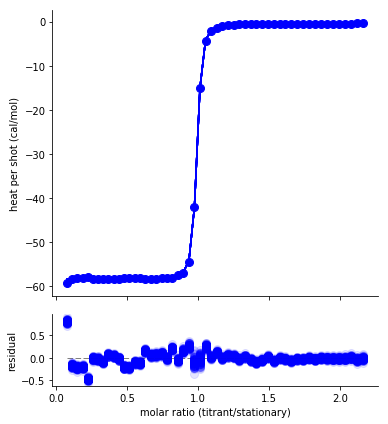

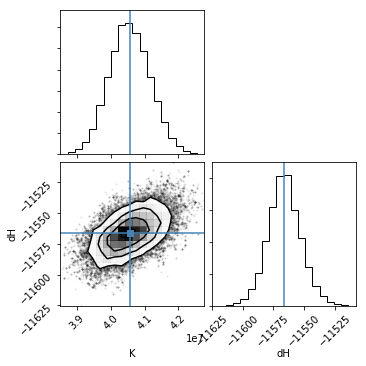

In [2]:
# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model.  Ignore the first two shots
a = pytc.ITCExperiment("ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter
g.add_experiment(a)

# Create the Bayesian fitter

# With these parameters, we start near the maximum likelihood solution and explore around it
F = pytc.fitters.BayesianFitter(num_steps=500,ml_guess=True,initial_walker_spread=0.0001,burn_in=0.10)

# --------------------------------------------------------------------
# Fit the data
g.fit(F)

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
c = g.corner_plot()
print(g.fit_as_csv)

### Repeat analysis, but this time don't bias result toward maximum likelihood result

# Fit successful? True
# 2017-05-16 08:50:29.213135
# Units: cal/mol
# Fit type: bayesian
#   bayesian: Burn in: 0.25
#   bayesian: Final sample number: 225000
#   bayesian: Initial walker spread: 0.1
#   bayesian: Num steps: 3000
#   bayesian: Num threads: 1
#   bayesian: Num walkers: 100
#   bayesian: Use ML guess: True
# AIC: -96.23529766726026
# AICc: -93.8005150585646
# BIC: -84.30139338787461
# F: 292709.018813179
# Rsq: 0.9999672033779136
# Rsq_adjusted: 0.9999637870631128
# df: 49
# ln(L): 54.11764883363013
# num_obs: 54
# num_param: 5
type,name,exp_file,value,stdev,bot95,top95,fixed,guess,lower_bound,upper_bound
local,dH,ca-edta/tris-01.DH,-1.15667e+04,1.41249e+01,-1.15944e+04,-1.15391e+04,False,-4.00000e+03,-inf,inf
local,dilution_intercept,ca-edta/tris-01.DH,-6.14835e-01,9.43674e-02,-7.99690e-01,-4.30071e-01,False,0.00000e+00,-inf,inf
local,dilution_heat,ca-edta/tris-01.DH,1.17381e+03,6.55920e+02,-1.15874e+02,2.45811e+03,False,0.00000e+00,-inf,inf
local,K,ca-edta/tris-01.DH,

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


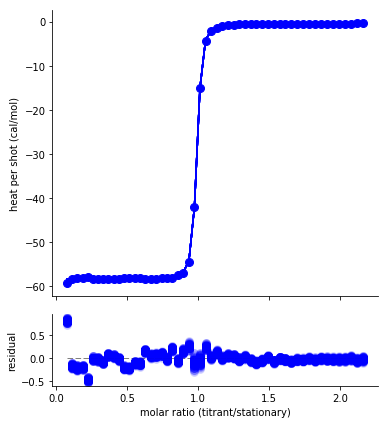

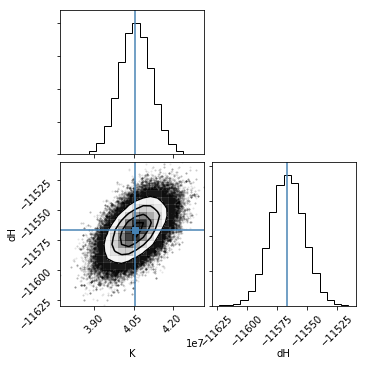

In [4]:
# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model.  Ignore the first two shots
a = pytc.ITCExperiment("ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter
g.add_experiment(a)

# Create the Bayesian fitter

# More agnostic fitter.  Make broad spread of initial walker positions, and run for a long time
F = pytc.fitters.BayesianFitter(num_steps=3000,ml_guess=True,initial_walker_spread=0.1,burn_in=0.25)

# --------------------------------------------------------------------
# Fit the data
g.fit(F)

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
c = g.corner_plot()
print(g.fit_as_csv)

